# 一、开始

## 1. 张量/Tensors

张量类似于 NumPy 的 ndarrays，此外，张量还可以用于 GPU 来加速计算。  
注：张量/tensor 可以简化理解为（多维）数组

In [1]:
from __future__ import print_function #为了可以使用后续版本的特性
import torch

#### 1. 构造一个未初始化的 5*3 矩阵

In [2]:
x = torch.empty(5, 3) #空矩阵不是零矩阵，所以输出不一定是全 0
print(x)

tensor([[1.8361e+25, 1.4603e-19, 6.4069e+02],
        [2.7489e+20, 1.5444e+25, 1.6217e-19],
        [7.0062e+22, 1.6795e+08, 4.7423e+30],
        [4.7393e+30, 9.5461e-01, 4.4377e+27],
        [1.7975e+19, 4.6894e+27, 7.9463e+08]])


#### 2. 构造一个随机初始化的 5*3 矩阵

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0078, 0.7660, 0.0735],
        [0.7900, 0.4127, 0.5554],
        [0.1693, 0.1083, 0.4782],
        [0.3356, 0.3059, 0.2959],
        [0.4690, 0.4573, 0.5679]])


#### 3. 构造一个数据类型为 long 的 5*3 矩阵

In [4]:
x = torch.zeros(5, 3, dtype = torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


#### 4. 直接用数据构造张量（tensor）

In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


#### 5. 创建一个基于现有张量的张量，以下方法会重新使用原 tensor 的属性，如：dtype，除非用户提供新的数据（给这个新张量）

In [6]:
x = x.new_ones(5, 3, dtype = torch.double)
print(x)

x = torch.randn_like(x, dtype = torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.9437, -1.1501,  1.0260],
        [-0.4182,  1.1111,  0.1536],
        [-2.0667, -0.2101,  1.1097],
        [-2.6034,  0.2181, -0.6140],
        [ 0.6355, -0.4602,  0.3058]])


#### 6. 获取张量的尺寸

In [7]:
print(x.size())

torch.Size([5, 3])


> torch.Size 是一个元组，因此支持所有元组的操作

## 2. 操作/Operations

### 增加/add

#### 1. add：语法1

In [8]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 2.7008, -0.5792,  1.0402],
        [-0.3556,  1.8177,  0.7269],
        [-1.0746,  0.2423,  1.9167],
        [-2.2260,  0.9477,  0.1030],
        [ 1.4965, -0.2597,  1.0368]])


#### 2. add：语法2

In [9]:
print(torch.add(x, y))

tensor([[ 2.7008, -0.5792,  1.0402],
        [-0.3556,  1.8177,  0.7269],
        [-1.0746,  0.2423,  1.9167],
        [-2.2260,  0.9477,  0.1030],
        [ 1.4965, -0.2597,  1.0368]])


#### 3. add：提供一个用于输出的张量作为参数

In [10]:
result = torch.empty(5, 3)
torch.add(x, y, out = result)
print(result)

tensor([[ 2.7008, -0.5792,  1.0402],
        [-0.3556,  1.8177,  0.7269],
        [-1.0746,  0.2423,  1.9167],
        [-2.2260,  0.9477,  0.1030],
        [ 1.4965, -0.2597,  1.0368]])


#### 4. add：原地操作/in-place（不使用额外的变量）

In [11]:
y.add_(x)
print(y)

tensor([[ 2.7008, -0.5792,  1.0402],
        [-0.3556,  1.8177,  0.7269],
        [-1.0746,  0.2423,  1.9167],
        [-2.2260,  0.9477,  0.1030],
        [ 1.4965, -0.2597,  1.0368]])


> <span id='actions_'>任何**原地**改变张量的操作都带有后缀`_`，如`x.copy_(y)`，`x.t_()`，这会改变 x 原本的值。</span>

#### 5. 可以使用标准的 NumPy 索引和其他的各种功能

In [12]:
print(x[:, 1])
#输出 x 的第 1 列（从 0 开始）

tensor([-1.1501,  1.1111, -0.2101,  0.2181, -0.4602])


### 改变尺寸/resize/reshape

#### 1. 如果需要改变张量的尺寸，可以使用 `torch.view`

In [13]:
x = torch.randn(4, 4)              #randn 随机的正态分布
y = x.view(16)                     #非 16 会 invalid
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


#### 2. 如果你有一个 1 元素的张量，通过 `.item()` 可以获取到元素的值

In [14]:
x = torch.randn(1)
print(x)
print(x.item())    #只有一个元素的张量才可以用.item，返回值是一个 number

tensor([-1.2310])
-1.2310194969177246


### 更多 tensor 的操作，包括置换、索引、切片、数学运算、线性代数、随机数等等，可以参考[文档](https://pytorch.org/docs/torch)

---

## 3. 与 NumPy 的互动

Torch 的张量和 NumPy 的数组将共享它们的内存地址(如果 Torch 张量存在于 CPU 上) ，更改其中一个将另一个也会改变。

### 将 Torch 张量转换为 NumPy 数组：Tensor → Array

In [15]:
a = torch.ones(5)
b = a.numpy()
print(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


看看 numpy 数组的值是如何改变的

In [16]:
a.add_(1) 
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


> `add_` 为什么有 `_` 参考[这里](#actions_)

### 将 NumPy 数组转换为 Torch 张量

In [17]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out = a)    #如果 out = b 会报错：返回值必须是（numpy 的）ArrayType
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


所有 CPU 上的张量，除了 CharTensor，都支持与 NumPy 互相转换。

---

## 4. CUDA 张量

张量可通过 `.to` 转移到任何设备上

In [18]:
# 仅在有 CUDA 设备时可运行
# 通过 torch.device 对象将张量放入/移出 GPU
x = torch.randn(5, 3)
if torch.cuda.is_available():
    device = torch.device("cuda")          # 一个 CUDA 设备的对象
    y = torch.ones_like(x, device=device)  # 直接在 GPU 上新建一个张量
    x = x.to(device)                       # 或者通过'to("cuda")'转移到 GPU 上
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # '.to' 可以同时修改 dtype!

  # 二、AUTOGRAD：自动微分/AUTOMATIC DIFFERENTIATION

PyTorch 的核心就是 `autograd` 包，它可以为张量的所有操作自动求微分。他是一个“由运行定义”的框架——你可以用代码指定如何反向传播，每一次迭代都可以不一样。

## 1. 张量/Tensor

`torch.Tensor` 是这个包的最重要的类。如果你把张量的 `.requires_grad` 属性置为 `True`，它会追踪张量上的所有操作。结束计算时，调用 `.backward()` 可以自动计算当前张量的所有梯度并自动累加在 `.grad` 属性上。  
  
若要停止追踪一个张量，你可以调用 `.detach()` 来把当前张量从计算历史中剥离，这样后续的张量计算就不会被追踪。  
  
为了避免继续追踪张量的计算以及内存占用，你可以用 `with torch.no_grad():` 来包裹代码块。这样操作在评估模型时很有用，因为模型在 `requires)grad=True` 时，参数可以被训练；但是评估模型时并不需要梯度（来训练模型）。  
  
还有一个在自动计算梯度是很重要的类：`Function`  
  
`Tensor` 和 `Function` 相互配合建立起一个无环图，这个无环图包含了所有计算的历史记录。每个张量都有一个 `.grad_fn` 属性，这个属性是创建这个 `Tensor` 的 `Function` 类的引用。（除了那些用户设定 `grad_fn is None` 的张量）  
  
如果你要计算导数，你可以调用 `Tensor` 的 `.backward()`。如果 `Tensor` 是一个标量（比如只有一个元素的张量），不需要为 `backward()` 指定任何参数，一旦这个张量有不止一个元素， 你就需要指定一个跟张量维度匹配的 `gradient` 参数。

In [19]:
import torch

#### 创建一个张量，并设置 `requires_grad=True` 来追踪计算

In [20]:
x = torch.ones(2, 2, requires_grad = True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


#### 操作一次张量

In [21]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


y 作为一次张量操作的结果，具有 `grad_fn` 属性

In [22]:
print(y.grad_fn)

#### 在 y 上执行更多操作

In [23]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


`requires_grad_()` 可以原地(in-place)修改现有张量的 `requires_grad`，默认参数为 `False`

In [24]:
a = torch.randn(2, 2)
a = ((a * 3) / (a -1))
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.requires_grad)
print(b.grad_fn)

False
True
True


---

## 2. 梯度/Gradients

我们现在开始反向传播，因为 `out` 包含了一个标量，所以 `out.backward()` 等价于 `out.backward(torch.tensor(1.))`

In [25]:
out.backward()

#### 打印出 x 的微分

In [26]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


你会得到一个都是 `4.5` 的矩阵。我们把张量 `out` 称作 “*o*”，则有 $o = \frac{1}{4}\sum_i z_i$，$z_i = 3(x_i+2)^2$，$z_i\bigr\rvert_{x_i=1} = 27$  
因此 $o$ 对 $x$ 的微分为 $\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$，所以$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$  
从数学角度讲，如果有一个向量 $\vec{y}$，$\vec{y}=f(\vec{x})$，$\vec{y}$ 关于 $\vec{x}$ 的梯度是一个雅各比矩阵：  

$$
\begin{split}J=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\end{split}
$$
 
 一般来说，`torch.autograd` 是一个计算向量-雅各比乘积的引擎。即，给定一个向量 $v=\left(\begin{array}{cccc} v_{1} & v_{2} & \cdots & v_{m}\end{array}\right)^{T}$，计算乘积 $v^{T}\cdot J$（$1\times m$ 的向量乘 $m\times n$ 的矩阵）。  
 如果 $v$ 是标量函数 $l=g\left(\vec{y}\right)$的梯度，即 $v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$，则根据链式法则，向量-雅各比的乘积就是向量 $l$ 对 $\vec{x}$ 的梯度：  
 
$$
\begin{split}J^{T}\cdot v=\left(\begin{array}{ccc}
 \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
 \vdots & \ddots & \vdots\\
 \frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
 \end{array}\right)\left(\begin{array}{c}
 \frac{\partial l}{\partial y_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial y_{m}}
 \end{array}\right)=\left(\begin{array}{c}
 \frac{\partial l}{\partial x_{1}}\\
 \vdots\\
 \frac{\partial l}{\partial x_{n}}
 \end{array}\right)\end{split}
$$  
 
（注意，$v^{T}\cdot J$ 返回的是行向量，也可以通过 $J^{T}\cdot v$ 来得到列向量）  
  
向量-雅可比乘积的这一特性使得向具有非标量输出的模型输入外部梯度变得非常方便。

下面来看一个向量-雅各比乘积的例子：

In [27]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([-1552.4756,  -413.1646,    70.3120], grad_fn=<MulBackward0>)


在这个例子中，`y` 不再是标量。`torch.autograd` 不能直接计算完整的雅各比矩阵，但如果我们想得到向量-雅各比乘积，只需要把向量作为参数传递给 `backward` 即可：

In [28]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float) #v 相当于一个权值向量
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


想停止追踪张量的计算历史，你可以把张量的 `.requires_grad` 设为 `True` ，也可以把代码块包在 `with torch.no_grad():` 中：

In [29]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


或是使用 `.detach()` 来获得一个内容相同但不需要梯度的新张量：

In [30]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all()) #不加.all()会返回一个跟 x 的 shape 相同的张量（即每个元素都进行对比）

True
False
tensor(True)


# 三、神经网络/Neural Network

神经网络可由 `torch.mm` 包创建。  

既然你已经大致了解过 `autograd` 了，其实 `nn` 正是依赖 `autograd` 来定义和微分神经网络。  
`nn.module` 包含了神经网络的各层，以及用来返回 `output` 的方法 `forward(input)`  

举个例子，以下是一个用来分类数字图片的（卷积神经）网络：
![convnet](https://pytorch.org/tutorials/_images/mnist.png)  

这是一个简单的前反馈网络。网络将输入的数据一层一层地传递并输出最终结果。  

神经网络的一个典型的训练流程如下：
  - 定义一个具有可学习的参数或者权重的神经网络
  - 迭代数据集作为输入
  - 通过神经网络处理输入的数据
  - 计算损失函数（距离正确的输出还有多远）
  - 把损失函数的梯度传递给参数
  - 更新网络的权重/参数，规则往往很简单：`新权重 = 旧权重 - 学习率 * 梯度`

## 1. 定义网络/Define the network <a id='nn'></a>

我们来定义一个网络：

In [31]:
import torch
import torch.nn as nn 
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        #1 个输入图像通道，6 个输出通道，3*3 的方形卷积核
        
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        #做一次仿射变换 y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120) #nn.Liner 是全连接层，6*6是图像的尺寸
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        #在 2*2大小的窗口上做 Max pooling
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        #如果 max pool 是一个正方形，你可以只输入一个值
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] #除了 batch 外的所有维度
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
        
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


你只需定义 `forward` 函数，`autograd` 会自动为你定义 `backward` 函数（用来计算梯度）。你可以在 `forward` 函数里使用张量的任何操作。  
模型的可学习参数可由 `net.parameters()` 返回。

In [32]:
for name, param in net.named_parameters():
    print(name, param.shape)

params = list(net.parameters())
print(len(params))
print(params[0].size())  #conv1's .weight

conv1.weight torch.Size([6, 1, 3, 3])
conv1.bias torch.Size([6])
conv2.weight torch.Size([16, 6, 3, 3])
conv2.bias torch.Size([16])
fc1.weight torch.Size([120, 576])
fc1.bias torch.Size([120])
fc2.weight torch.Size([84, 120])
fc2.bias torch.Size([84])
fc3.weight torch.Size([10, 84])
fc3.bias torch.Size([10])
10
torch.Size([6, 1, 3, 3])


我们来尝试一个 $32\times 32$ 随机输入的 LeNet，要在 MNIST 数据集上使用这个网络，需要先将数据集的图像尺寸转换成 $32\times 32$

In [33]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0504, -0.0647,  0.0788, -0.0020,  0.1262,  0.1139, -0.0115,  0.0795,
         -0.0389, -0.0514]], grad_fn=<AddmmBackward>)


将梯度缓存归零并且向后传播随机的梯度：

In [34]:
net.zero_grad()
out.backward(torch.randn(1, 10))

> `torch.nn` 只支持 mini-batches，整个 torch.nn 包只支持小批量样本的输入，而不支持单个样本。
比如，`nn.Conv2d` 需要一个 4 维张量 `nSamples * nChannels * Height * Width`  
如果只有一个样本，只需使用 `input.unsqueeze(0)` 添加一个假的批处理尺寸。

再进一步处理前，让我们回顾一下你已经学会了什么。  
### 回顾：
- `torch.Tensor` 是一个支持像 `backward` 等自动微分操作的多维数组
- `nn.Module` 神经网络模块，方便的参数封装方式，有助于将参数移动到 GPU、导出、加载等等
- `nn.Parameter` 作为一类张量，当作为属性分配给 `Module` 时，自动注册为参数。
- `autograd.Function` 实现自动微分操作的正向和反向传播。每个 `Tensor` 至少创建一个 `Function` 节点，该节点来连接到创建 `Tensor` 的函数并对其历史进行编码。  

### 目前为止，我们进行了：  
- 定义一个神经网络  
- 处理输入数据和调用反向传播  

### 接下来：  
- 计算损失函数  
- 更新网络内的权重

---  

## 2. 损失函数/Loss Function

损失函数接受输入对(输出，目标)，并估算出输出值于目标间的距离。  
在 nn 包中有几种不同的[损失函数](https://pytorch.org/docs/nn.html#loss-functions)。一个简单的损失定义是: `nn.MSELoss`，它计算输入值和目标值之间的**均方误差**。

举例如下：

In [35]:
output = net(input)
target = torch.randn(10)  # 价目表，就举个例子,这是一个一维数组
target = target.view(1, -1)  # 跟输出的维度一致，变成[1*10]的张量
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4922, grad_fn=<MseLossBackward>)


现在，如果你沿着损失的反方向，使用它的 `.grad_fn` 属性，你会看到一个如下的计算图:
```
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss
```

所以，当我们调用 `loss.backward()` ，会按照整个计算图对损失函数求微分。图中 `requires_grad=True` 的张量具有 `.grad` 属性，这个属性是一个用来累加梯度的张量。  

为了说明这一点，我们来反向推几步：

In [36]:
print(loss.grad_fn)                                           #均方误差/MESLoss
print(loss.grad_fn.next_functions[0][0])                      #全连接层/Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #线性整流函数/ReLU（激活函数）

---

## 3. 反向传播/Backprop <a id='backprop'></a>

我们只需使用 `loss.backward()` 即可反向传播误差，你需要清除已有的梯度，否则新的梯度会被累加到旧的梯度上。  
  
现在我们来调用 `loss.backward()`，看看在反向传播前后 conv1 偏差/bias 的梯度

In [37]:
net.zero_grad()                 #将所有参数的梯度归零
print('反向传播前的 conv1.bias.grad')
print(net.conv1.bias.grad)

loss.backward()

print('反向传播后的 conv1.bias.grad')
print(net.conv1.bias.grad)

反向传播前的 conv1.bias.grad
tensor([0., 0., 0., 0., 0., 0.])
反向传播后的 conv1.bias.grad
tensor([-9.0250e-03, -4.3450e-03,  3.0949e-03,  4.1120e-05,  1.0309e-02,
        -2.7495e-03])


好，你已经知道了如何使用损失函数了。  

### 稍后阅读：  
- 神经网络包 `nn` 囊括了构成深层神经网络的各种模块和损失函数。完整的文档列表在[这里](https://pytorch.org/docs/nn)。  

### 只剩下一个没学：
- 更新网络的权值

---

## 4. 更新网络的权值/Update the weights

实践中最常用的就是随机梯度下降法（SGD）：
`权重 = 权重 - 学习率 * 梯度`  

我们可以用下面很简单的 Python 代码实现它：

In [38]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)
    


然而，在你使用神经网络时，你想使用各种不同的更新算法，比如SGD、Nesterov-SGD、Adam、RMSProp等等。为了实现这点，我们构建了一个包：`torch.optim`，实现了所有上述的算法。用起来很简单：

In [39]:
import torch.optim as optim

#创建你的优化器
optimizer = optim.SGD(net.parameters(), lr = 0.1)

#在你的训练循环中
optimizer.zero_grad()              #将梯度的缓存归零
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()                   #执行更新操作

> 观察梯度缓冲区是如何使用 `optimizer.zero _ grad()` 手动设置为零的。需要归零是因为梯度是按照 [Backprop](#backprop) 部分的说明累加的。

# 四、训练一个分类器

目前你已经了解了如何定义神经网络，计算损失和更新网络的权重。  
现在你可能在想，  

## 关于数据  
通常，当你需要处理图像、文本、音频或视频数据时，可以使用标准的 python 包将数据加载到 numpy 数组中。然后你可以把这个数组转换成一个 `torch.*Tensor`。
- Pillow、OpenCV 等包适用于处理图像
- scipy 和 librosa 等包适用于处理音频
- 对于文本，原生 Python 或者 Cython、NLTK 以及 SpaCy 都很好用  

针对（计算机）视觉，我们开发了一个叫做 `torchvision` 的包，其中包含了用于常见数据集（如 Imagenet、 CIFAR10、 MNIST 等）的数据加载器，以及用于图像的数据转换器，即 `torchion.datasets` 和 `torch.utils.data.DataLoader` 。  

这些包提供了大量的便利，避免了重复造轮子的过程。  

在这部分教程里，我们会用到 CIFAR10 数据集。数据集包括“飞机”、“轿车”、“鸟”、“猫”、“鹿”、“狗”、“蛙”、“马”、“船”、“卡车”十个类别。CIFAR10 的图片尺寸是 $3\times 32 \times 32$，即，$32\times 32$ 像素的 3 通道（RGB）图片。  
![CIFAR10.png](https://i.loli.net/2020/10/16/25PSz3sednuY64t.png)

---

## 训练一个图像分类器

我们来依次进行以下的步骤：
1. 用 `torchvision` 加载并归一化 CIFAR10 的训练集和测试集
2. 定义一个卷积神经网络
3. 定义一个损失函数
4. 用训练集训练这个神经网络
5. 用测试集测试这个神经网络  

### 1. 加载并归一化 CIFAR10（准备数据）  
通过 `torchvision`，我们可以很方便地加载 CIFAR10（数据集）

In [40]:
import torch
import torchvision
import torchvision.transforms as transforms

torchvision 数据集的输出是 $[0,1]$ 上的 PILImage 类型的图像，我们需要把这些图像归一化在 $[-1,1]$ 上的张量，注意：  
如果在 Windows 上运行时出现了一个 **BrokenPipeError**，请尝试将 `torch.utils.data. DataLoader()` 的 `num _ worker` 设置为`0`。

In [41]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


我们看一点训练集里的图片，就为了玩：

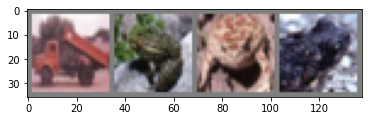

truck  frog  frog  frog


In [42]:
import matplotlib.pyplot as plt
import numpy as np

#预览图片的函数

def imshow(img):
    img = img / 2 + 0.5     #反归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#随机获取一些训练图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

#预览图片
imshow(torchvision.utils.make_grid(images))

#打印出标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 2. 定义一个卷积神经网络  
复制[上文](#nn)定义神经网络部分，修改它为输入3通道的图像（之前定义的是 1 通道的图像）。

In [43]:
import torch.nn as nnn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()

### 3. 定义损失函数和优化器  
我们用交叉熵做损失函数，用带梯度的随机梯度下降法做优化。

In [44]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 4. 训练网络  
下面开始变得有意思了。我们只需要循环遍历数据迭代器，将输入信息提供给网络并进行优化。

In [45]:
for epoch in range(2):                        #多次循环遍历数据集
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #获取输入信息，data 是一个[inputs, labels]列表
        inputs, labels = data
        
        #参数的梯度归零
        optimizer.zero_grad()
        
        #前向传播 + 后向传播 + 梯度优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #打印统计信息
        running_loss += loss.item()
        if i % 2000 == 1999:                    #每经过 2000 个 mini-batches 打印一次
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('训练结束')

[1,  2000] loss: 2.156
[1,  4000] loss: 1.790
[1,  6000] loss: 1.634
[1,  8000] loss: 1.545
[1, 10000] loss: 1.491
[1, 12000] loss: 1.443
[2,  2000] loss: 1.383
[2,  4000] loss: 1.375
[2,  6000] loss: 1.358
[2,  8000] loss: 1.335
[2, 10000] loss: 1.299
[2, 12000] loss: 1.288
训练结束


快点把训练好的模型保存下来：

In [46]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

点击[这里](https://pytorch.org/docs/stable/notes/serialization.html)查看保存 PyTorch 模型的更多细节。

### 5. 用测试数据测试网络  
我们的网络已经学习了两次训练集。但是我们需要检查一下这个网络是不是真的学到了什么东西。  

我们将通过对比神经网络预测出的标签和真实数据进行对比。如果预测正确，我们将正确的样本添加到正确预测表中。  

第一步，我们预览一些测试集的图片来熟悉一下内容。

4


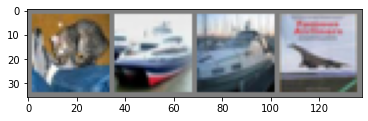

真实值：   cat  ship  ship plane


In [60]:
dataiter = iter(testloader)
images, labels = dataiter.next()

#预览图片
imshow(torchvision.utils.make_grid(images))
print('真实值：', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

下一步，我们载入之前保存的模型（注：不比在个例子中保存、读取模型，我们这么做只是为了说明如何保存和读取模型）：

In [48]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

好，现在我们看看神经网络会认为上面的图片都是什么：

In [49]:
outputs = net(images)

输出的信息是图片属于这 10 种类别的概率。某类的概率越高，意味着神经网络认为这张图属于这一类的可能性越大。所以，我们看看概率最高的标签都是什么：

In [61]:
_, predicted = torch.max(outputs, 1)     #1 用来指定维度

print('预测值：', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

预测值：   cat  ship  ship  ship


结果看起来还行。  
我们再看看这个网络在整个测试集上的表现：

In [64]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('10000张图片上网络的精确度为：%d %%' % (100 * correct/total))

10000张图片上网络的精确度为：55 %


这看起来比随机选择要好得多，因为随机选择的准确率是 10% (从 10 个类中随机选择一个类)。看起来网络的确学到了点东西。  
emmm，那么预测哪些类别的表现比较好，而哪些比较差呢：

In [67]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('%5s 的准确度：%2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

plane 的准确度：62 %
  car 的准确度：66 %
 bird 的准确度：37 %
  cat 的准确度：32 %
 deer 的准确度：50 %
  dog 的准确度：35 %
 frog 的准确度：66 %
horse 的准确度：66 %
 ship 的准确度：77 %
truck 的准确度：61 %


那接下来呢？  
我们如何把这个网络放到 GPU 上运行？

---

## 在 GPU 上训练  
跟张量一样，神经网络一样可以转移到 GPU 上。  
如果有可用的 CUDA，我们先定义一个可见的 cuda 设备：

In [68]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#如果我们有装备 CUDA 的机器，下面会打印出一个 CUDA 设备
print(device)

cpu


本节的其余部分假定该设备是 CUDA 设备。  
然后这些方法将递归地遍历所有模块，并将其参数和缓冲区转换为 CUDA 张量:

In [69]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

你必须记得在每一步都将输入和目标发送给 GPU:

In [71]:
inputs, labels = data[0].to(device), data[1].to(device)

为什么我没有看到 GPU 比 CPU 快很多呢？因为你的网络实在是太小了。  
#### 练习：  
尝试增加网络的宽度（第一个 `nn.Conv2d` 的第 2 个参数）以及第二个 `nn.Conv2d` 的第 1 个参数。他们需要相同的数字) ，看看切换到 GPU 上可以加速多少。  

#### 达成的目标：  
- 从高层次理解 PyTorch 的张量库和神经网络
- 训练一个小型神经网络来分类图像

---

## 在多个 GPU 上训练

如果你想使用所有的 gpu 实现更大规模的加速，请查看可选项：[数据并行](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html)